In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sbn
import sklearn
from sklearn import tree

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


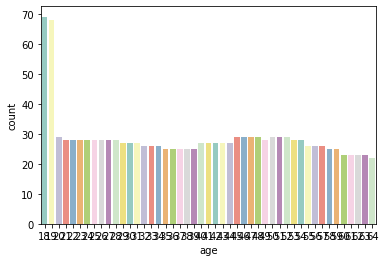

In [5]:
sbn.countplot(x = 'age', data=df, palette='Set3')
from matplotlib import rcParams
rcParams['figure.figsize'] = 15.7, 8

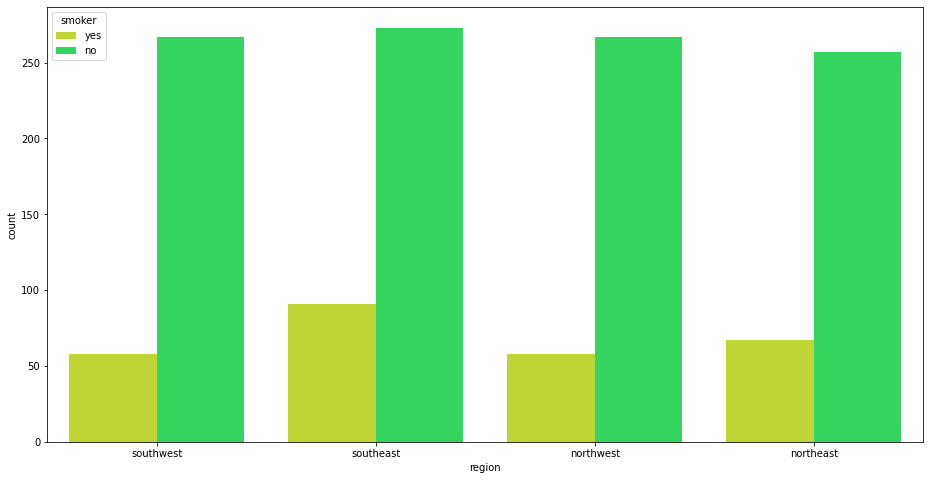

In [6]:
sbn.countplot(x='region',hue='smoker', data=df, palette=["#D5EE1B", "#1BEE51"])
rcParams['figure.figsize'] = 15,5

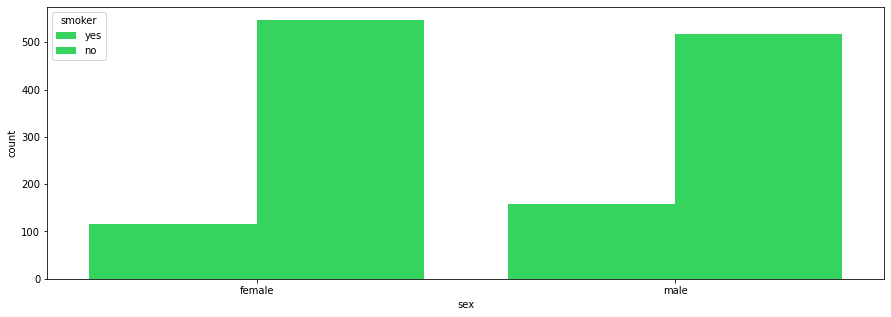

In [7]:
sbn.countplot(x='sex',hue='smoker', data=df, palette=["#1BEE51"])
rcParams['figure.figsize'] = 6, 4

# Using Loop for Label Encoding 

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [9]:
import numpy as np
from pandas.core.dtypes.common import is_numeric_dtype
for column in df.columns:
    if is_numeric_dtype(df[column]):
        continue
    else:
        df[column] = le.fit_transform(df[column])

In [10]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [11]:
y=df['smoker']
y.head()

0    1
1    0
2    0
3    0
4    0
Name: smoker, dtype: int32

In [12]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: smoker, dtype: int32

In [13]:
x = df.copy()

In [14]:
x = df.drop('smoker', axis = 1)
x.head()

,age,sex,bmi,children,region,charges
0,19,0,27.900,0,3,16884.92400
1,18,1,33.770,1,2,1725.55230
2,28,1,33.000,3,2,4449.46200
3,33,1,22.705,0,1,21984.47061
4,32,1,28.880,0,1,3866.85520


# Feature

In [15]:
x = df.copy()
x = df.drop('smoker', axis= 1)

In [16]:
x.head()

,age,sex,bmi,children,region,charges
0,19,0,27.900,0,3,16884.92400
1,18,1,33.770,1,2,1725.55230
2,28,1,33.000,3,2,4449.46200
3,33,1,22.705,0,1,21984.47061
4,32,1,28.880,0,1,3866.85520


# Spliting Data for Train and Test

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=3)

In [18]:
x_test.head()

,age,sex,bmi,children,region,charges
353,33,1,35.245,0,0,12404.8791
339,46,0,27.720,1,2,8232.6388
65,19,0,28.900,0,3,1743.2140
685,53,1,26.410,2,0,11244.3769
781,18,1,41.140,0,2,1146.7966


In [19]:
x_train

,age,sex,bmi,children,region,charges
522,51,0,33.915,0,0,9866.30485
849,55,1,32.775,0,1,10601.63225
600,18,0,39.160,0,2,1633.04440
314,27,0,31.400,0,3,34838.87300
759,18,1,38.170,0,2,36307.79830
...,...,...,...,...,...,...
789,62,0,29.920,0,2,13457.96080
256,56,1,33.630,0,1,43921.18370
968,21,1,25.745,2,0,3279.86855
952,30,0,28.405,1,1,4527.18295


In [20]:
x_test.count()

age         402
sex         402
bmi         402
children    402
region      402
charges     402
dtype: int64

In [21]:
x_train.count()

age         936
sex         936
bmi         936
children    936
region      936
charges     936
dtype: int64

In [22]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# Decision Tree Algorithm

In [23]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

# Fit the train data to the model

In [24]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

# All about Confusion Matrix

In [25]:
y_pred = dtc.predict(x_test)

* Model Accuracy and Performance Measurement 

In [26]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [27]:
np.array(y_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

# Confusion Matrix

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
confusion_matrix(y_test, y_pred)

array([[312,   8],
       [  6,  76]], dtype=int64)

In [30]:
tp, fn, fp, tn = confusion_matrix(y_test, y_pred).reshape(-1)

In [31]:
tp,fn,fp,tn

(312, 8, 6, 76)

In [32]:
accuracy = (tn + tp) / (len(y_test))

In [33]:
accuracy

0.9651741293532339

In [34]:
precision = tp / (tp + fp)

In [35]:
precision

0.9811320754716981

In [36]:
recall = tp / (tp + fn)

In [37]:
recall

0.975

In [38]:
dtc.score(x_test,y_test)

0.9651741293532339

In [39]:
dtc.score(x_train, y_train)

1.0

In [40]:
cm = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

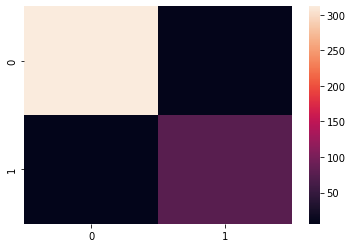

In [41]:
sbn.heatmap(cm)

<AxesSubplot:>

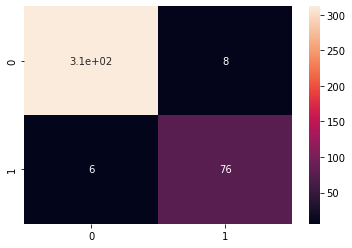

In [42]:
sbn.heatmap(cm, annot=True)

Text(33.0, 0.5, 'Actual Value')

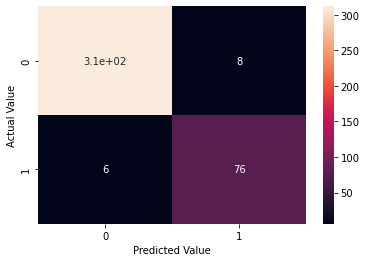

In [43]:
sbn.heatmap(cm, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

In [44]:
fdr = fp / (tp+fp)
fdr

0.018867924528301886

In [45]:
csi = tp / (tp+fn+fp)

In [46]:
csi

0.9570552147239264

In [47]:
specificity = tn / (tn + fp)
specificity

0.926829268292683

In [48]:
harmonic_mean = (2 * precision * recall) / (precision + recall)

In [49]:
harmonic_mean

0.9780564263322885

In [50]:
f1 = (precision + recall)/ 2
f1

0.978066037735849

In [51]:
fpr = fp/(fp+tn)
fpr

0.07317073170731707

# Roc and Auc Curve

In [52]:
from sklearn.metrics import classification_report, plot_roc_curve

In [53]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.98      0.97      0.98       320\n           1       0.90      0.93      0.92        82\n\n    accuracy                           0.97       402\n   macro avg       0.94      0.95      0.95       402\nweighted avg       0.97      0.97      0.97       402\n'

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       320
           1       0.90      0.93      0.92        82

    accuracy                           0.97       402
   macro avg       0.94      0.95      0.95       402
weighted avg       0.97      0.97      0.97       402



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


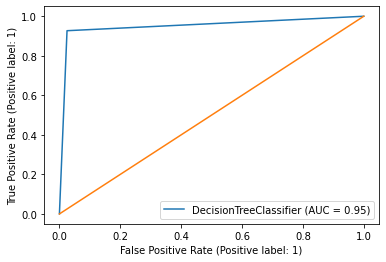

In [55]:
plot_roc_curve(dtc,x_test, y_test)
plt.plot([0,1],[0,1])

In [56]:
auc = np.trapz(y_test, y_pred)

In [57]:
auc

-1.5